In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
path = '/Users/paw_paw/Library/CloudStorage/GoogleDrive-keyuqing597@gmail.com/我的云端硬盘/PC5287_M.SC Coursework Thesis for Physics And Technology/data set'

In [168]:
file = open(path+'/SG_GPR_sorted.geojson')
GPR = gpd.read_file(file)

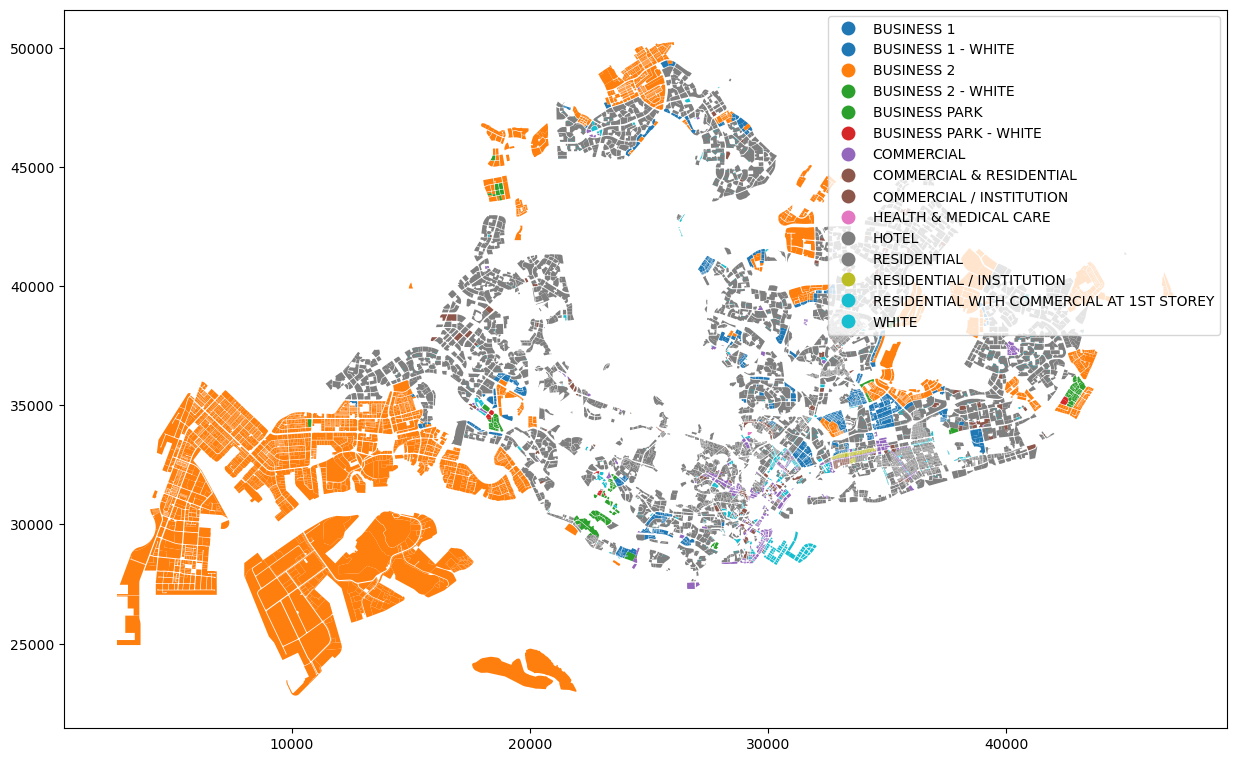

In [169]:
fig = GPR.plot(
    column="LU_DESC",
    legend=True,    
    figsize=(15, 10)
    ).get_figure()

In [170]:
fig.savefig(path+"/land_use.png")

In [171]:
Land_Use = GPR['LU_DESC']

Land_Use = pd.DataFrame(Land_Use)

Land_Use.drop_duplicates(keep='first',inplace=True)

Land_Use.sort_values(by='LU_DESC', inplace=True)

Land_Use.reset_index(drop=True, inplace=True)

def get_pop(Land_Use):
    return GPR.loc[GPR['LU_DESC']==Land_Use]['POP_DENS'].sum()

Land_Use['POP_DENS']=Land_Use['LU_DESC'].apply(get_pop)

Land_Use

,LU_DESC,POP_DENS
0,BUSINESS 1,1.774064e+07
1,BUSINESS 1 - WHITE,5.038643e+05
2,BUSINESS 2,1.433412e+08
3,BUSINESS 2 - WHITE,6.833796e+05
4,BUSINESS PARK,5.319393e+06
5,BUSINESS PARK - WHITE,6.036983e+05
6,COMMERCIAL,1.225783e+07
7,COMMERCIAL & RESIDENTIAL,7.511292e+06
8,COMMERCIAL / INSTITUTION,3.809644e+05
9,HEALTH & MEDICAL CARE,7.418918e+04


https://www.ura.gov.sg/maps/media/mp/MPUG_2014_for_map_legend.htm

In [172]:
GPR.replace(to_replace={'LU_DESC':{'BUSINESS 1',
                                   'BUSINESS 1 - WHITE',
                                   'BUSINESS 2',
                                   'BUSINESS 2 - WHITE',
                                   'BUSINESS PARK',
                                   'BUSINESS PARK - WHITE',
                                   'HEALTH & MEDICAL CARE'
                                  }},
            value='BUSINESS',
            inplace=True)

In [173]:
GPR.replace(to_replace={'LU_DESC':{'COMMERCIAL',
                                   'COMMERCIAL / INSTITUTION'}},
            value='COMMERCIAL',
            inplace=True)

In [174]:
GPR.replace(to_replace={'LU_DESC':{'COMMERCIAL & RESIDENTIAL',
                                   'RESIDENTIAL WITH COMMERCIAL AT 1ST STOREY',
                                   'RESIDENTIAL / INSTITUTION',
                                   'HOTEL',
                                   'WHITE'
                                  }},
            value='RESIDENTIAL',
            inplace=True)

In [175]:
POP_DENS = GPR.groupby(by=['PLN_AREA_N','LU_DESC']).sum(numeric_only=True)
POP_DENS.drop(columns=['GPR_NUM','SHAPE_Area'],inplace=True)

In [176]:
PA_List=GPR['PLN_AREA_N'].drop_duplicates(keep='first').reset_index(drop=True)

In [177]:
PA_List=pd.DataFrame(PA_List)

In [178]:
def pop(PA,land_use):
    try: 
        return POP_DENS.loc[PA,land_use].values[0]
    except (KeyError,TypeError):
        pass 

In [179]:
PA_List['BUSINESS']=PA_List.PLN_AREA_N.apply(pop,args=['BUSINESS'])

In [180]:
PA_List['COMMERCIAL']=PA_List.PLN_AREA_N.apply(pop,args=['COMMERCIAL'])

In [181]:
PA_List['RESIDENTIAL']=PA_List.PLN_AREA_N.apply(pop,args=['RESIDENTIAL'])

In [182]:
PA_List.fillna(0,inplace=True)

In [241]:
PA_List.to_csv(path+'/GPR_pop.csv',index=False)

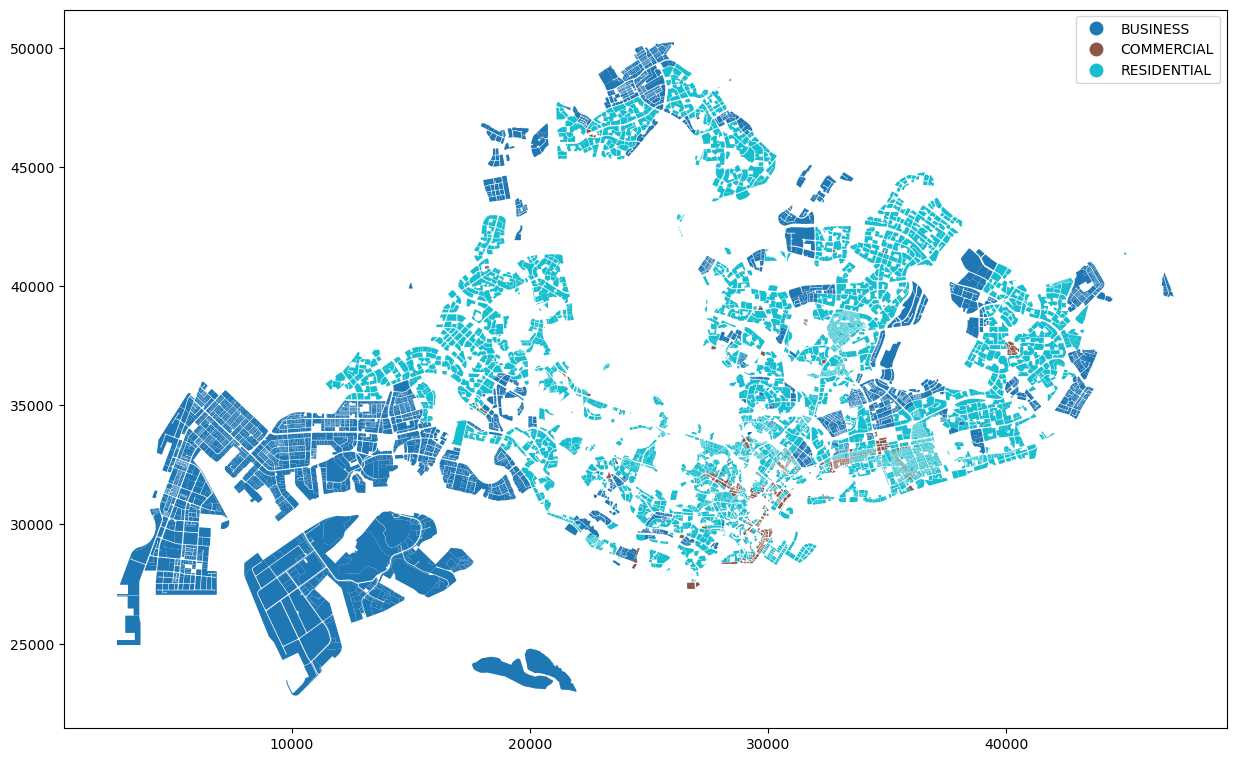

In [242]:
GPR.plot(
    column="LU_DESC",
    legend=True,    
    figsize=(15, 10)
).get_figure().savefig(path+"/land_use_classified.png")

GPR is actually the vacancy for the places. 

In [185]:
GPR

,attributes,GPR,GPR_NUM,PLN_AREA_N,SUBZONE_N,SHAPE_Area,LU_DESC,POP_DENS,geometry
0,"{'OBJECTID': 108481, 'LU_DESC': 'BUSINESS 2', ...",1.0,1.0,TUAS,TUAS VIEW EXTENSION,735026.472606,BUSINESS,735026.472606,"POLYGON ((3606.500 26171.307, 3606.500 26171.3..."
1,"{'OBJECTID': 108482, 'LU_DESC': 'BUSINESS 2', ...",1.0,1.0,TUAS,TUAS VIEW EXTENSION,345914.636037,BUSINESS,345914.636037,"POLYGON ((3606.131 27006.302, 3606.500 26171.3..."
2,"{'OBJECTID': 108669, 'LU_DESC': 'BUSINESS 2', ...",1.0,1.0,TUAS,TUAS VIEW EXTENSION,9411.081297,BUSINESS,9411.081297,"POLYGON ((3606.131 27006.302, 2668.620 27006.3..."
3,"{'OBJECTID': 108617, 'LU_DESC': 'BUSINESS 2', ...",1.0,1.0,TUAS,TUAS VIEW EXTENSION,966310.427138,BUSINESS,966310.427138,"POLYGON ((3240.090 28525.774, 3856.615 28295.2..."
4,"{'OBJECTID': 108505, 'LU_DESC': 'BUSINESS 2', ...",1.0,1.0,TUAS,TUAS VIEW EXTENSION,8077.741680,BUSINESS,8077.741680,"POLYGON ((3855.740 28295.878, 3856.615 28295.2..."
...,...,...,...,...,...,...,...,...,...
33112,"{'OBJECTID': 110388, 'LU_DESC': 'RESIDENTIAL',...",1.4,1.4,MARINE PARADE,KATONG,288.225272,RESIDENTIAL,403.515381,"POLYGON ((35964.658 32631.632, 35952.880 32622..."
33113,"{'OBJECTID': 110401, 'LU_DESC': 'RESIDENTIAL',...",1.4,1.4,MARINE PARADE,KATONG,130.410105,RESIDENTIAL,182.574148,"POLYGON ((35930.834 32637.795, 35925.593 32633..."
33114,"{'OBJECTID': 111503, 'LU_DESC': 'RESIDENTIAL',...",1.4,1.4,MARINE PARADE,KATONG,164.929047,RESIDENTIAL,230.900666,"POLYGON ((35945.784 32617.567, 35940.580 32613..."
33115,"{'OBJECTID': 111504, 'LU_DESC': 'RESIDENTIAL',...",1.4,1.4,MARINE PARADE,KATONG,158.483763,RESIDENTIAL,221.877268,"POLYGON ((35940.580 32613.595, 35938.195 32611..."


## Subzone Geo Data

In [58]:
sz = gpd.read_file(path+"/master-plan-2019-subzone-boundary-no-sea/master-plan-2019-subzone-boundary-no-sea-geojson.geojson")  
#sz for subzones
#read geojson file 
sz = sz.to_crs(3414)

In [59]:
def extract_desc_pa(desc_pa):
    return desc_pa.split('PLN_AREA_N')[1].split('<td>')[1].split('<')[0]

def extract_desc_sz(desc_sz):
    return desc_sz.split('SUBZONE_N')[2].split('<td>')[1].split('<')[0]

In [60]:
sz['SUBZONE_N']=sz.Description.apply(extract_desc_sz)
sz['PLN_AREA_N'] = sz.Description.apply(extract_desc_pa)

In [96]:
sz

,Name,Description,geometry,SUBZONE_N,PLN_AREA_N
0,kml_1,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((33222.981 29588.127 0.000, 33222.5...",MARINA EAST,MARINA EAST
1,kml_2,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((28481.446 30886.220 0.000, 28483.4...",INSTITUTION HILL,RIVER VALLEY
2,kml_3,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((28087.344 30540.999 0.000, 28087.5...",ROBERTSON QUAY,SINGAPORE RIVER
3,kml_4,<center><table><tr><th colspan='2' align='cent...,"MULTIPOLYGON Z (((14557.697 30447.212 0.000, 1...",JURONG ISLAND AND BUKOM,WESTERN ISLANDS
4,kml_5,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((29542.526 31041.199 0.000, 29553.7...",FORT CANNING,MUSEUM
...,...,...,...,...,...
327,kml_328,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((29036.498 38365.086 0.000, 29015.4...",UPPER THOMSON,BISHAN
328,kml_329,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((28228.195 39216.137 0.000, 28271.5...",SHANGRI-LA,ANG MO KIO
329,kml_330,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((29649.875 38978.996 0.000, 29671.3...",TOWNSVILLE,ANG MO KIO
330,kml_331,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((29469.703 36372.102 0.000, 29466.1...",MARYMOUNT,BISHAN


## Bus Stop Location

In [74]:
# read the bus stops' location data 
bus_loc = pd.read_csv(path + '/Bus_stops_2019.02.01.csv')

# transform the dataframe into GeoDataFrame format, 
# and then transform the cordinate into SVY21 
bus_loc = gpd.GeoDataFrame(bus_loc, geometry=gpd.points_from_xy(bus_loc.Longitude,bus_loc.Latitude))
bus_loc = bus_loc.drop(columns=['Latitude', 'Longitude'])
bus_loc = bus_loc.set_crs(epsg=4326)
bus_loc = bus_loc.to_crs(3414)

In [75]:
sz_geo =sz.set_index(['SUBZONE_N'])['geometry'].to_dict()

def get_SUBZONE_N(coordinate):
    for key in sz_geo:
        if coordinate.within(sz_geo.get(key)):
            return key 

In [76]:
bus_loc['SUBZONE_N'] = bus_loc.geometry.apply(get_SUBZONE_N)

In [77]:
bus_loc

,RequestTimestamp,BusStopCode,RoadName,Description,geometry,SUBZONE_N
0,2019.02.01.03.00.00,43759,Bt Batok Rd,Blk 443D,POINT (17269.854 37561.743),BRICKWORKS
1,2019.02.01.03.00.00,43761,Bt Batok Rd,Opp Dulwich Coll,POINT (17354.077 36989.704),PLANTATION
2,2019.02.01.03.00.00,43769,Bt Batok Rd,Dulwich Coll/Blk 445,POINT (17371.596 37069.306),BRICKWORKS
3,2019.02.01.03.00.00,43771,Bt Batok Rd,Bef Bt Batok West Ave 2,POINT (17766.452 38229.766),PARK
4,2019.02.01.03.00.00,43779,Bt Batok Rd,Aft Bt Batok West Ave 2,POINT (17811.742 38223.842),BRICKWORKS
...,...,...,...,...,...,...
5007,2019.02.01.03.00.00,28049,Boon Lay Way,Opp The Synergy,POINT (18516.429 34767.639),TOH GUAN
5008,2019.02.01.03.00.00,28051,Boon Lay Way,Big Box,POINT (18253.414 34943.549),JURONG GATEWAY
5009,2019.02.01.03.00.00,28059,Boon Lay Way,Ng Teng Fong General Hosp,POINT (18260.894 34978.534),JURONG GATEWAY
5010,2019.02.01.03.00.00,28061,Boon Lay Way,Jurong East Stn/Int,POINT (17898.205 35349.804),JURONG GATEWAY


## link Stops with landuse

In [122]:
import fiona
from shapely.geometry import shape
import numpy as np

In [157]:
GPR_dict_SUBZONE_N=GPR.set_index(GPR.index)['SUBZONE_N']

In [194]:
GPR_dict_LU_DESC=GPR.set_index(GPR.index)['LU_DESC']

In [158]:
GPR_dict_SUBZONE_N

0        TUAS VIEW EXTENSION
1        TUAS VIEW EXTENSION
2        TUAS VIEW EXTENSION
3        TUAS VIEW EXTENSION
4        TUAS VIEW EXTENSION
                ...         
33112                 KATONG
33113                 KATONG
33114                 KATONG
33115                 KATONG
33116                 KATONG
Name: SUBZONE_N, Length: 33117, dtype: object

In [160]:
GPR_dict_geometry=GPR.set_index(GPR.index)['geometry']

In [193]:
GPR_dict_geometry

0        POLYGON ((3606.500 26171.307, 3606.500 26171.3...
1        POLYGON ((3606.131 27006.302, 3606.500 26171.3...
2        POLYGON ((3606.131 27006.302, 2668.620 27006.3...
3        POLYGON ((3240.090 28525.774, 3856.615 28295.2...
4        POLYGON ((3855.740 28295.878, 3856.615 28295.2...
                               ...                        
33112    POLYGON ((35964.658 32631.632, 35952.880 32622...
33113    POLYGON ((35930.834 32637.795, 35925.593 32633...
33114    POLYGON ((35945.784 32617.567, 35940.580 32613...
33115    POLYGON ((35940.580 32613.595, 35938.195 32611...
33116    POLYGON ((35976.852 32672.288, 35972.656 32669...
Name: geometry, Length: 33117, dtype: geometry

In [192]:
GPR.loc[GPR['SUBZONE_N']=='TUAS VIEW EXTENSION'].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
             806,  807,  808,  809,  810,  811,  812,  813, 1014, 1015],
           dtype='int64', length=233)

In [239]:
for stops in range (0,5012):
    SUBZONE_N = bus_loc.iloc[stops]['SUBZONE_N']
    sqr_No = GPR.loc[GPR['SUBZONE_N']==SUBZONE_N].index
    for sqrs in sqr_No:
        if bus_loc.at[stops,'geometry'].within(GPR_dict_geometry[sqrs]):
            bus_loc.at[stops,'LU_DESC'] = GPR_dict_LU_DESC[sqrs]

In [240]:
bus_loc

,RequestTimestamp,BusStopCode,RoadName,Description,geometry,SUBZONE_N,LU_DESC
0,2019.02.01.03.00.00,43759,Bt Batok Rd,Blk 443D,POINT (17269.854 37561.743),BRICKWORKS,0.0
1,2019.02.01.03.00.00,43761,Bt Batok Rd,Opp Dulwich Coll,POINT (17354.077 36989.704),PLANTATION,0.0
2,2019.02.01.03.00.00,43769,Bt Batok Rd,Dulwich Coll/Blk 445,POINT (17371.596 37069.306),BRICKWORKS,0.0
3,2019.02.01.03.00.00,43771,Bt Batok Rd,Bef Bt Batok West Ave 2,POINT (17766.452 38229.766),PARK,0.0
4,2019.02.01.03.00.00,43779,Bt Batok Rd,Aft Bt Batok West Ave 2,POINT (17811.742 38223.842),BRICKWORKS,0.0
...,...,...,...,...,...,...,...
5007,2019.02.01.03.00.00,28049,Boon Lay Way,Opp The Synergy,POINT (18516.429 34767.639),TOH GUAN,0.0
5008,2019.02.01.03.00.00,28051,Boon Lay Way,Big Box,POINT (18253.414 34943.549),JURONG GATEWAY,0.0
5009,2019.02.01.03.00.00,28059,Boon Lay Way,Ng Teng Fong General Hosp,POINT (18260.894 34978.534),JURONG GATEWAY,0.0
5010,2019.02.01.03.00.00,28061,Boon Lay Way,Jurong East Stn/Int,POINT (17898.205 35349.804),JURONG GATEWAY,0.0


But then I found that, the GPR squares are only the buildings, they does not contain busstops or MRT stations. 